# Feature Engineering(Dhaka-2018 Dataset) 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Dhaka\\real_2018.csv")

In [3]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,-,-,-,-,-,-,-,-,333.0,EU
1,2,-,-,-,-,-,-,-,-,280.0,VU
2,3,18.6,24.6,14.2,1011.8,48,3.2,3.5,9.4,264.0,VU
3,4,15.7,21.8,10.5,1013.4,69,2.7,3.5,5.4,315.0,EU
4,5,16.3,22.5,11.5,1011.5,78,1.9,2,3.5,336.0,EU


In [4]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D         365 non-null    object 
 1   T         218 non-null    object 
 2   TM        218 non-null    object 
 3   Tm        218 non-null    object 
 4   SLP       218 non-null    object 
 5   H         218 non-null    object 
 6   VV        218 non-null    object 
 7   V         218 non-null    object 
 8   VM        218 non-null    object 
 9   AQI       361 non-null    float64
 10  Category  361 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.5+ KB


In [5]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,-,-,-,-,-,-,-,-,333.0,EU
1,2,-,-,-,-,-,-,-,-,280.0,VU
2,3,18.6,24.6,14.2,1011.8,48,3.2,3.5,9.4,264.0,VU
3,4,15.7,21.8,10.5,1013.4,69,2.7,3.5,5.4,315.0,EU
4,5,16.3,22.5,11.5,1011.5,78,1.9,2,3.5,336.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,-,-,-,-,-,-,-,-,259.0,VU
361,28,-,-,-,-,-,-,-,-,261.0,VU
362,29,-,-,-,-,-,-,-,-,225.0,VU
363,30,-,-,-,-,-,-,-,-,210.0,VU


In [6]:
aqi_data.isnull().sum()

D             0
T           147
TM          147
Tm          147
SLP         147
H           147
VV          147
V           147
VM          147
AQI           4
Category      4
dtype: int64

In [7]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.0,EU
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.0,VU
2,3,18.6,24.6,14.2,1011.8,48,3.2,3.5,9.4,264.0,VU
3,4,15.7,21.8,10.5,1013.4,69,2.7,3.5,5.4,315.0,EU
4,5,16.3,22.5,11.5,1011.5,78,1.9,2,3.5,336.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.0,VU
361,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,VU
362,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,VU


In [8]:
aqi.isnull().sum()

D             0
T           207
TM          207
Tm          207
SLP         207
H           207
VV          207
V           207
VM          215
AQI           4
Category      4
dtype: int64

<AxesSubplot:>

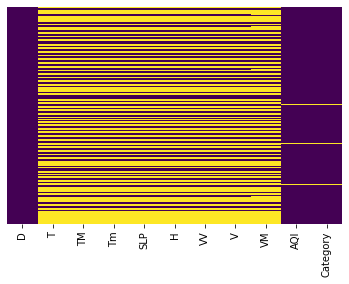

In [9]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Missing value Handling 
                   
                   1. Delete row data.
                   2. Create new model.
                   3. Statistical Method(Mean,Median,Mode)
                   
                   But here we use Statistical Method(Mean)
       

### 
T = Average Temperature (°C) , TM = Maximum temperature (°C), 

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa), 

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


## Convert object type as float type

In [10]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1(January)

Find monthly mean

In [11]:
df1 = aqi.iloc[0:31,0:11]
df1

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.0,EU
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.0,VU
2,3,18.6,24.6,14.2,1011.8,48.0,3.2,3.5,9.4,264.0,VU
3,4,15.7,21.8,10.5,1013.4,69.0,2.7,3.5,5.4,315.0,EU
4,5,16.3,22.5,11.5,1011.5,78.0,1.9,2.0,3.5,336.0,EU
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.0,VU
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0,EU
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341.0,EU
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.0,EU
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.0,EU


In [12]:
df1.isnull().sum()

D            0
T           22
TM          22
Tm          22
SLP         22
H           22
VV          22
V           22
VM          24
AQI          0
Category     0
dtype: int64

In [13]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())

In [14]:
df1

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.7,5.428571,333.0,EU
1,2,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.7,5.428571,280.0,VU
2,3,18.600000,24.600000,14.200000,1011.800000,48.000000,3.200000,3.5,9.400000,264.0,VU
3,4,15.700000,21.800000,10.500000,1013.400000,69.000000,2.700000,3.5,5.400000,315.0,EU
4,5,16.300000,22.500000,11.500000,1011.500000,78.000000,1.900000,2.0,3.500000,336.0,EU
5,6,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.7,5.428571,264.0,VU
6,7,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.7,5.428571,330.0,EU
7,8,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.7,5.428571,341.0,EU
8,9,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.7,5.428571,355.0,EU
9,10,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.7,5.428571,372.0,EU


# Month-2 (February)

In [15]:
df2 = aqi.iloc[31:59,0:11]
df2

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,20.7,25.5,14.4,1011.2,59.0,2.6,0.7,3.5,359.0,EU
32,2,20.8,25.8,17.6,1011.8,73.0,1.3,0.0,NaN,548.0,EU
33,3,20.1,25.5,16.0,1012.5,79.0,1.1,0.0,NaN,557.0,EU
34,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.0,EU
35,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.0,EU
36,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.0,EU
37,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415.0,EU
38,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343.0,EU
39,9,23.1,28.6,17.6,1011.4,54.0,3.2,0.9,3.5,295.0,VU
40,10,23.6,28.5,20.4,1014.3,46.0,2.7,1.9,3.5,278.0,VU


In [16]:
df2.isnull().sum()

D            0
T           14
TM          14
Tm          14
SLP         14
H           14
VV          14
V           14
VM          16
AQI          0
Category     0
dtype: int64

In [17]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())

In [18]:
df2

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,20.700000,25.50,14.400000,1011.200000,59.000000,2.600000,0.700000,3.500000,359.0,EU
32,2,20.800000,25.80,17.600000,1011.800000,73.000000,1.300000,0.000000,4.291667,548.0,EU
33,3,20.100000,25.50,16.000000,1012.500000,79.000000,1.100000,0.000000,4.291667,557.0,EU
34,4,23.121429,28.75,18.064286,1012.192857,57.928571,3.278571,1.064286,4.291667,376.0,EU
35,5,23.121429,28.75,18.064286,1012.192857,57.928571,3.278571,1.064286,4.291667,301.0,EU
36,6,23.121429,28.75,18.064286,1012.192857,57.928571,3.278571,1.064286,4.291667,374.0,EU
37,7,23.121429,28.75,18.064286,1012.192857,57.928571,3.278571,1.064286,4.291667,415.0,EU
38,8,23.121429,28.75,18.064286,1012.192857,57.928571,3.278571,1.064286,4.291667,343.0,EU
39,9,23.100000,28.60,17.600000,1011.400000,54.000000,3.200000,0.900000,3.500000,295.0,VU
40,10,23.600000,28.50,20.400000,1014.300000,46.000000,2.700000,1.900000,3.500000,278.0,VU


In [19]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-3(March)

In [20]:
df3 = aqi.iloc[59:90,0:11]
df3

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,25.9,31.5,20.4,1009.7,58.0,3.7,0.7,5.4,367.0,EU
60,2,26.7,32.6,20.8,1007.8,56.0,3.9,1.9,9.4,428.0,EU
61,3,27.4,33.8,22.0,1005.6,63.0,3.7,2.8,5.4,240.0,VU
62,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.0,VU
63,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,VU
64,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.0,EU
65,7,26.2,32.3,19.6,1011.6,35.0,4.7,2.8,5.4,289.0,VU
66,8,26.5,32.0,17.5,1011.4,39.0,4.5,1.9,5.4,307.0,EU
67,9,25.6,32.2,19.8,1010.2,50.0,4.5,2.0,5.4,362.0,EU
68,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415.0,EU


In [21]:
df3.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [22]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())

In [23]:
df3

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,25.9000,31.5000,20.400,1009.70000,58.000,3.70000,0.70000,5.4000,367.0,EU
60,2,26.7000,32.6000,20.800,1007.80000,56.000,3.90000,1.90000,9.4000,428.0,EU
61,3,27.4000,33.8000,22.000,1005.60000,63.000,3.70000,2.80000,5.4000,240.0,VU
62,4,26.9625,33.1875,20.725,1009.31875,56.125,4.28125,2.05625,6.1375,227.0,VU
63,5,26.9625,33.1875,20.725,1009.31875,56.125,4.28125,2.05625,6.1375,247.0,VU
64,6,26.9625,33.1875,20.725,1009.31875,56.125,4.28125,2.05625,6.1375,311.0,EU
65,7,26.2000,32.3000,19.600,1011.60000,35.000,4.70000,2.80000,5.4000,289.0,VU
66,8,26.5000,32.0000,17.500,1011.40000,39.000,4.50000,1.90000,5.4000,307.0,EU
67,9,25.6000,32.2000,19.800,1010.20000,50.000,4.50000,2.00000,5.4000,362.0,EU
68,10,26.9625,33.1875,20.725,1009.31875,56.125,4.28125,2.05625,6.1375,415.0,EU


# Month-4(April)

In [24]:
df4 = aqi.iloc[90:120,0:11]
df4

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,27.5,34.0,20.5,1009.4,52.0,5.1,5.0,27.8,230.0,VU
91,2,26.1,30.0,21.4,1009.9,67.0,4.0,2.0,5.4,210.0,VU
92,3,28.5,34.2,24.2,1008.3,55.0,5.0,1.3,3.5,282.0,VU
93,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.0,EU
94,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,VU
95,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,U
96,7,26.7,32.0,22.2,1009.5,70.0,4.0,3.1,13.0,171.0,U
97,8,27.3,32.7,22.4,1010.8,69.0,4.2,0.0,NaN,171.0,U
98,9,30.4,33.6,22.3,1010.5,55.0,4.5,1.1,5.4,224.0,VU
99,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,C


In [25]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          17
AQI          0
Category     0
dtype: int64

In [26]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())

In [27]:
df4

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,27.500000,34.000000,20.50,1009.4,52.000000,5.100000,5.000000,27.800000,230.0,VU
91,2,26.100000,30.000000,21.40,1009.9,67.000000,4.000000,2.000000,5.400000,210.0,VU
92,3,28.500000,34.200000,24.20,1008.3,55.000000,5.000000,1.300000,3.500000,282.0,VU
93,4,27.486667,33.146667,21.72,1008.1,66.333333,4.713333,3.093333,11.507692,305.0,EU
94,5,27.486667,33.146667,21.72,1008.1,66.333333,4.713333,3.093333,11.507692,204.0,VU
95,6,27.486667,33.146667,21.72,1008.1,66.333333,4.713333,3.093333,11.507692,160.0,U
96,7,26.700000,32.000000,22.20,1009.5,70.000000,4.000000,3.100000,13.000000,171.0,U
97,8,27.300000,32.700000,22.40,1010.8,69.000000,4.200000,0.000000,11.507692,171.0,U
98,9,30.400000,33.600000,22.30,1010.5,55.000000,4.500000,1.100000,5.400000,224.0,VU
99,10,27.486667,33.146667,21.72,1008.1,66.333333,4.713333,3.093333,11.507692,139.0,C


In [28]:
df4.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-5 (May)

In [29]:
df5 = aqi.iloc[120:151,0:11]
df5

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,27.7,33.0,21.5,1007.7,69.0,4.3,4.4,9.4,111.0,C
121,2,25.2,32.8,21.4,1007.9,79.0,5.0,4.6,9.4,149.0,C
122,3,27.8,32.5,20.8,1008.9,69.0,4.8,3.5,5.4,191.0,U
123,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0,U
124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,C
125,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,M
126,7,27.2,30.0,21.2,1004.7,82.0,4.5,4.8,9.4,105.0,C
127,8,29.8,33.0,24.6,1004.2,80.0,4.5,5.9,11.1,78.0,M
128,9,28.1,31.9,25.6,1006.4,82.0,4.5,4.3,11.1,104.0,C
129,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,C


In [30]:
df5.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          0
Category     0
dtype: int64

In [31]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())

In [32]:
df5

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,27.70,33.000000,21.50,1007.700000,69.000000,4.300000,4.400000,9.4,111.0,C
121,2,25.20,32.800000,21.40,1007.900000,79.000000,5.000000,4.600000,9.4,149.0,C
122,3,27.80,32.500000,20.80,1008.900000,69.000000,4.800000,3.500000,5.4,191.0,U
123,4,27.98,32.526667,23.74,1005.346667,76.533333,4.586667,3.813333,8.3,174.0,U
124,5,27.98,32.526667,23.74,1005.346667,76.533333,4.586667,3.813333,8.3,129.0,C
125,6,27.98,32.526667,23.74,1005.346667,76.533333,4.586667,3.813333,8.3,90.0,M
126,7,27.20,30.000000,21.20,1004.700000,82.000000,4.500000,4.800000,9.4,105.0,C
127,8,29.80,33.000000,24.60,1004.200000,80.000000,4.500000,5.900000,11.1,78.0,M
128,9,28.10,31.900000,25.60,1006.400000,82.000000,4.500000,4.300000,11.1,104.0,C
129,10,27.98,32.526667,23.74,1005.346667,76.533333,4.586667,3.813333,8.3,116.0,C


In [33]:
df5.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-6 (June)

In [34]:
df6 = aqi.iloc[151:181,0:11]
df6

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,26.7,32.0,23.6,1006.1,87.0,3.9,4.3,9.4,94.0,M
152,2,28.8,33.2,25.1,1004.5,83.0,4.5,2.8,5.4,98.0,M
153,3,28.0,34.2,25.4,1002.2,86.0,4.2,0.7,5.4,105.0,C
154,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.0,U
155,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,C
156,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,C
157,7,31.2,34.0,28.0,1000.8,78.0,4.5,1.3,5.4,106.0,C
158,8,31.1,34.3,27.2,998.2,78.0,4.8,2.2,5.4,79.0,M
159,9,30.8,35.1,27.0,994.8,76.0,4.5,1.3,5.4,93.0,M
160,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,C


In [35]:
df6.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          1
Category     1
dtype: int64

In [36]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())
df6["AQI"] = df6["AQI"].fillna(value=df6["AQI"].mean())

In [37]:
df6

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,26.700000,32.000000,23.600000,1006.100000,87.000000,3.900000,4.300000,9.400000,94.000000,M
152,2,28.800000,33.200000,25.100000,1004.500000,83.000000,4.500000,2.800000,5.400000,98.000000,M
153,3,28.000000,34.200000,25.400000,1002.200000,86.000000,4.200000,0.700000,5.400000,105.000000,C
154,4,29.426667,33.293333,25.913333,999.833333,80.866667,4.506667,3.526667,11.566667,161.000000,U
155,5,29.426667,33.293333,25.913333,999.833333,80.866667,4.506667,3.526667,11.566667,147.000000,C
156,6,29.426667,33.293333,25.913333,999.833333,80.866667,4.506667,3.526667,11.566667,103.000000,C
157,7,31.200000,34.000000,28.000000,1000.800000,78.000000,4.500000,1.300000,5.400000,106.000000,C
158,8,31.100000,34.300000,27.200000,998.200000,78.000000,4.800000,2.200000,5.400000,79.000000,M
159,9,30.800000,35.100000,27.000000,994.800000,76.000000,4.500000,1.300000,5.400000,93.000000,M
160,10,29.426667,33.293333,25.913333,999.833333,80.866667,4.506667,3.526667,11.566667,104.000000,C


In [38]:
df6.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    1
dtype: int64

# Month-7 (July)

In [39]:
df7 = aqi.iloc[181:212,0:11]
df7

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,30.3,33.2,26.9,1001.6,73.0,5.5,10.0,13.0,70.0,M
182,2,29.6,33.6,25.8,1000.7,79.0,5.3,3.9,5.4,67.0,M
183,3,27.3,29.8,25.6,999.7,91.0,3.9,3.5,5.4,73.0,M
184,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,M
185,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,M
186,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,C
187,7,30.9,34.5,27.1,998.5,71.0,5.8,3.9,5.4,77.0,M
188,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,M
189,9,29.2,31.6,27.5,999.8,81.0,4.7,6.5,9.4,94.0,M
190,10,29.7,32.8,27.1,999.5,78.0,4.7,4.4,9.4,107.0,C


In [40]:
df7.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          0
Category     0
dtype: int64

In [41]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())

In [42]:
df7

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,30.30,33.20,26.900000,1001.600000,73.0,5.500000,10.000000,13.000000,70.0,M
182,2,29.60,33.60,25.800000,1000.700000,79.0,5.300000,3.900000,5.400000,67.0,M
183,3,27.30,29.80,25.600000,999.700000,91.0,3.900000,3.500000,5.400000,73.0,M
184,4,29.38,32.54,26.833333,998.973333,80.6,4.606667,4.666667,8.486667,90.0,M
185,5,29.38,32.54,26.833333,998.973333,80.6,4.606667,4.666667,8.486667,89.0,M
186,6,29.38,32.54,26.833333,998.973333,80.6,4.606667,4.666667,8.486667,122.0,C
187,7,30.90,34.50,27.100000,998.500000,71.0,5.800000,3.900000,5.400000,77.0,M
188,8,29.38,32.54,26.833333,998.973333,80.6,4.606667,4.666667,8.486667,90.0,M
189,9,29.20,31.60,27.500000,999.800000,81.0,4.700000,6.500000,9.400000,94.0,M
190,10,29.70,32.80,27.100000,999.500000,78.0,4.700000,4.400000,9.400000,107.0,C


In [43]:
df7.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-8 (August)

In [44]:
df8 = aqi.iloc[212:243,0:11]
df8

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,27.9,32.5,26.6,998.5,86.0,4.0,1.3,5.4,80.0,M
213,2,27.6,30.5,26.2,1000.8,88.0,4.2,2.2,9.4,118.0,C
214,3,28.3,32.6,25.6,999.8,82.0,4.3,2.4,5.4,119.0,C
215,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,C
216,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,U
217,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,C
218,7,29.8,33.6,27.0,999.6,71.0,4.5,4.3,9.4,116.0,C
219,8,30.4,33.4,27.4,1001.5,72.0,4.5,5.0,9.4,108.0,C
220,9,29.3,34.0,27.2,1002.9,79.0,4.5,2.4,9.4,102.0,C
221,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,M


In [45]:
df8.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          2
Category     2
dtype: int64

In [46]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [47]:
df8

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,27.900000,32.50,26.600000,998.500000,86.000000,4.000000,1.30,5.400000,80.000000,M
213,2,27.600000,30.50,26.200000,1000.800000,88.000000,4.200000,2.20,9.400000,118.000000,C
214,3,28.300000,32.60,25.600000,999.800000,82.000000,4.300000,2.40,5.400000,119.000000,C
215,4,29.573333,33.26,26.906667,1000.493333,77.333333,4.546667,4.04,8.853333,119.000000,C
216,5,29.573333,33.26,26.906667,1000.493333,77.333333,4.546667,4.04,8.853333,156.000000,U
217,6,29.573333,33.26,26.906667,1000.493333,77.333333,4.546667,4.04,8.853333,147.000000,C
218,7,29.800000,33.60,27.000000,999.600000,71.000000,4.500000,4.30,9.400000,116.000000,C
219,8,30.400000,33.40,27.400000,1001.500000,72.000000,4.500000,5.00,9.400000,108.000000,C
220,9,29.300000,34.00,27.200000,1002.900000,79.000000,4.500000,2.40,9.400000,102.000000,C
221,10,29.573333,33.26,26.906667,1000.493333,77.333333,4.546667,4.04,8.853333,78.000000,M


In [48]:
df8.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    2
dtype: int64

# Month-9 (September)

In [49]:
df9 = aqi.iloc[243:273,0:11]
df9

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,29.9,33.7,27.8,1003.1,75.0,5.0,5.9,9.4,65.0,M
244,2,28.3,32.3,26.4,1003.6,85.0,4.2,2.8,5.4,55.0,M
245,3,30.6,32.2,25.8,1003.1,76.0,4.8,5.6,9.4,72.0,M
246,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,M
247,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,C
248,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,M
249,7,28.2,29.0,26.6,1005.6,85.0,4.8,4.8,9.4,87.0,M
250,8,31.0,34.4,27.4,1005.8,68.0,5.0,5.6,7.6,90.0,M
251,9,30.2,34.6,27.0,1006.4,71.0,4.7,2.0,5.4,75.0,M
252,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,M


In [50]:
df9.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          0
Category     0
dtype: int64

In [51]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())

In [52]:
df9

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,29.900000,33.700000,27.800000,1003.100000,75.000000,5.000000,5.900000,9.400000,65.0,M
244,2,28.300000,32.300000,26.400000,1003.600000,85.000000,4.200000,2.800000,5.400000,55.0,M
245,3,30.600000,32.200000,25.800000,1003.100000,76.000000,4.800000,5.600000,9.400000,72.0,M
246,4,29.757143,33.142857,26.671429,1006.171429,76.571429,4.692857,3.978571,10.457143,94.0,M
247,5,29.757143,33.142857,26.671429,1006.171429,76.571429,4.692857,3.978571,10.457143,109.0,C
248,6,29.757143,33.142857,26.671429,1006.171429,76.571429,4.692857,3.978571,10.457143,71.0,M
249,7,28.200000,29.000000,26.600000,1005.600000,85.000000,4.800000,4.800000,9.400000,87.0,M
250,8,31.000000,34.400000,27.400000,1005.800000,68.000000,5.000000,5.600000,7.600000,90.0,M
251,9,30.200000,34.600000,27.000000,1006.400000,71.000000,4.700000,2.000000,5.400000,75.0,M
252,10,29.757143,33.142857,26.671429,1006.171429,76.571429,4.692857,3.978571,10.457143,81.0,M


In [53]:
df9.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-10 (October)

In [54]:
df10 = aqi.iloc[273:304,0:11]
df10

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,30.6,36.1,25.0,1007.6,56.0,5.0,2.2,7.6,176.0,U
274,2,29.8,35.6,24.4,1008.1,60.0,5.0,1.1,38.9,177.0,U
275,3,31.1,35.9,26.8,1008.2,61.0,4.8,2.8,5.4,165.0,U
276,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.0,U
277,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.0,U
278,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.0,U
279,7,29.4,34.6,24.4,1009.0,66.0,4.3,0.9,7.6,197.0,U
280,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,U
281,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0,C
282,10,25.5,29.0,24.6,1009.5,85.0,4.0,2.6,7.6,77.0,M


In [55]:
df10.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          1
Category     1
dtype: int64

In [56]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())
df10["AQI"] = df10["AQI"].fillna(value=df10["AQI"].mean())

In [57]:
df10

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,30.600000,36.100000,25.000000,1007.600000,56.0,5.000000,2.200000,7.600000,176.000000,U
274,2,29.800000,35.600000,24.400000,1008.100000,60.0,5.000000,1.100000,38.900000,177.000000,U
275,3,31.100000,35.900000,26.800000,1008.200000,61.0,4.800000,2.800000,5.400000,165.000000,U
276,4,27.326667,31.946667,23.546667,1010.606667,69.2,4.253333,2.426667,9.366667,187.000000,U
277,5,27.326667,31.946667,23.546667,1010.606667,69.2,4.253333,2.426667,9.366667,187.000000,U
278,6,27.326667,31.946667,23.546667,1010.606667,69.2,4.253333,2.426667,9.366667,191.000000,U
279,7,29.400000,34.600000,24.400000,1009.000000,66.0,4.300000,0.900000,7.600000,197.000000,U
280,8,27.326667,31.946667,23.546667,1010.606667,69.2,4.253333,2.426667,9.366667,200.000000,U
281,9,27.326667,31.946667,23.546667,1010.606667,69.2,4.253333,2.426667,9.366667,133.000000,C
282,10,25.500000,29.000000,24.600000,1009.500000,85.0,4.000000,2.600000,7.600000,77.000000,M


In [58]:
df10.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    1
dtype: int64

# Month-11 (November)

In [59]:
df11 = aqi.iloc[304:334,0:11]
df11

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,U
305,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.0,VU
306,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0,U
307,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,U
308,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,C
309,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,U
310,7,24.4,29.1,22.0,1013.3,74.0,4.0,1.1,5.4,228.0,VU
311,8,24.7,30.2,20.4,1012.1,63.0,3.9,1.1,5.4,208.0,VU
312,9,23.7,29.5,18.6,1011.2,74.0,3.5,1.3,5.4,265.0,VU
313,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.0,EU


In [60]:
df11.isnull().sum()

D            0
T           21
TM          21
Tm          21
SLP         21
H           21
VV          21
V           21
VM          23
AQI          0
Category     0
dtype: int64

In [61]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())

In [62]:
df11

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,164.0,U
305,2,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,226.0,VU
306,3,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,167.0,U
307,4,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,155.0,U
308,5,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,105.0,C
309,6,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,170.0,U
310,7,24.400000,29.100000,22.000000,1013.300000,74.000000,4.000000,1.100000,5.400000,228.0,VU
311,8,24.700000,30.200000,20.400000,1012.100000,63.000000,3.900000,1.100000,5.400000,208.0,VU
312,9,23.700000,29.500000,18.600000,1011.200000,74.000000,3.500000,1.300000,5.400000,265.0,VU
313,10,24.188889,29.922222,19.266667,1012.488889,65.888889,3.666667,1.533333,6.542857,365.0,EU


In [63]:
df11.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-12(December)

In [64]:
df12 = aqi.iloc[334:365,0:11]
df12

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.2,26.6,18.0,1014.1,67.0,3.7,1.1,5.4,349.0,EU
335,2,20.3,27.8,16.7,1012.5,70.0,3.5,0.9,5.4,262.0,VU
336,3,21.8,28.5,16.7,1014.1,61.0,3.9,1.1,5.4,235.0,VU
337,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,VU
338,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,VU
339,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,VU
340,7,21.9,26.6,16.1,1012.6,56.0,4.0,1.1,3.5,243.0,VU
341,8,21.8,27.4,17.8,1013.4,58.0,3.4,3.3,9.4,236.0,VU
342,9,20.3,27.6,16.2,1012.6,70.0,3.5,0.7,5.4,196.0,U
343,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.0,VU


In [65]:
df12.isnull().sum() 

D            0
T           25
TM          25
Tm          25
SLP         25
H           25
VV          25
V           25
VM          25
AQI          0
Category     0
dtype: int64

In [66]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())

In [67]:
df12

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.200000,26.600000,18.000000,1014.100000,67.000000,3.700000,1.100000,5.40,349.0,EU
335,2,20.300000,27.800000,16.700000,1012.500000,70.000000,3.500000,0.900000,5.40,262.0,VU
336,3,21.800000,28.500000,16.700000,1014.100000,61.000000,3.900000,1.100000,5.40,235.0,VU
337,4,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.75,239.0,VU
338,5,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.75,255.0,VU
339,6,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.75,240.0,VU
340,7,21.900000,26.600000,16.100000,1012.600000,56.000000,4.000000,1.100000,3.50,243.0,VU
341,8,21.800000,27.400000,17.800000,1013.400000,58.000000,3.400000,3.300000,9.40,236.0,VU
342,9,20.300000,27.600000,16.200000,1012.600000,70.000000,3.500000,0.700000,5.40,196.0,U
343,10,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.75,241.0,VU


In [68]:
df12.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Add 12 months frame in a single frame

In [69]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.700000,5.428571,333.0,EU
1,2,16.788889,22.522222,12.111111,1012.611111,68.222222,2.344444,1.700000,5.428571,280.0,VU
2,3,18.600000,24.600000,14.200000,1011.800000,48.000000,3.200000,3.500000,9.400000,264.0,VU
3,4,15.700000,21.800000,10.500000,1013.400000,69.000000,2.700000,3.500000,5.400000,315.0,EU
4,5,16.300000,22.500000,11.500000,1011.500000,78.000000,1.900000,2.000000,3.500000,336.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.750000,259.0,VU
361,28,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.750000,261.0,VU
362,29,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.750000,225.0,VU
363,30,21.216667,27.416667,16.916667,1013.216667,63.666667,3.666667,1.366667,5.750000,210.0,VU


In [70]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.79,22.52,12.11,1012.61,68.22,2.34,1.70,5.43,333.0,EU
1,2,16.79,22.52,12.11,1012.61,68.22,2.34,1.70,5.43,280.0,VU
2,3,18.60,24.60,14.20,1011.80,48.00,3.20,3.50,9.40,264.0,VU
3,4,15.70,21.80,10.50,1013.40,69.00,2.70,3.50,5.40,315.0,EU
4,5,16.30,22.50,11.50,1011.50,78.00,1.90,2.00,3.50,336.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,21.22,27.42,16.92,1013.22,63.67,3.67,1.37,5.75,259.0,VU
361,28,21.22,27.42,16.92,1013.22,63.67,3.67,1.37,5.75,261.0,VU
362,29,21.22,27.42,16.92,1013.22,63.67,3.67,1.37,5.75,225.0,VU
363,30,21.22,27.42,16.92,1013.22,63.67,3.67,1.37,5.75,210.0,VU


In [71]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# AQI Range

1. 0 - 50    = GOOD

2. 51 - 100  = MODERATE

3. 101 - 150 = CAUTION

4. 151 - 200 = UNHEALTHY

5. 201 - 300 = VERY UNHEALTHY

6. 301- 500 = EXTREMELY HEALTHY

In [72]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [73]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

In [74]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\DhakaNew\Data-2018.csv', index=False)